# Paper 4: The Coupling Asymmetry — Executive Load as Eigenstate

**DOI:** [10.5281/zenodo.18519187](https://doi.org/10.5281/zenodo.18519187)

This notebook demonstrates the **Coupling Asymmetry**: the observation that
executive dysfunction is not a deficit but an **eigenstate** of the memory–baseline
system under excessive coupling load.

## The Core Insight

Every active coupling $\kappa_i$ between an agent and a task, person, or obligation
consumes a portion of the agent's **executive bandwidth**. The total load is:

$$L(t) = \sum_i \kappa_i(t) \cdot w_i$$

where $w_i$ is the cognitive weight of coupling $i$ (complexity, emotional cost,
time pressure). When $L$ exceeds a critical threshold $L_c$, the system transitions
from a **fluid** state (tasks flow, decisions happen) to a **frozen** state
(paralysis, avoidance, executive dysfunction).

This is not personal failure. It is a **phase transition** — as physical as
water freezing at 0°C.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import matplotlib.colors as mcolors

np.random.seed(42)
print('Executive Load diagnostic ready.')

Executive Load diagnostic ready.


## 1. Defining Coupling Load

Each active commitment is a coupling with three parameters:
- **$\kappa$**: bond strength (how tightly coupled you are to this task/person)
- **$w$**: cognitive weight (complexity × emotional cost × urgency)
- **$\kappa \cdot w$**: the actual load contribution

Let's define a realistic weekday for someone with ADHD, clinical anxiety,
or burnout — not extraordinary tasks, just an ordinary Tuesday.

In [2]:
# Define a realistic coupling portfolio
couplings = [
    # (name, kappa, weight, category)
    ('Morning routine',       0.3, 0.2, 'self'),
    ('Commute / transit',     0.2, 0.3, 'environment'),
    ('Primary work task',     0.8, 0.7, 'work'),
    ('Email backlog',         0.5, 0.5, 'work'),
    ('Slack messages',        0.4, 0.4, 'work'),
    ('Meeting (1pm)',         0.6, 0.6, 'work'),
    ('Grocery list',          0.3, 0.3, 'home'),
    ('Overdue bill',          0.7, 0.8, 'home'),
    ('Text back friend',     0.4, 0.2, 'social'),
    ('Partner check-in',     0.6, 0.3, 'social'),
    ('Background worry',     0.5, 0.6, 'internal'),
    ('Physical discomfort',  0.3, 0.4, 'internal'),
]

names    = [c[0] for c in couplings]
kappas   = np.array([c[1] for c in couplings])
weights  = np.array([c[2] for c in couplings])
cats     = [c[3] for c in couplings]
loads    = kappas * weights

total_load = loads.sum()

hdr = ('Coupling', 'κ', 'w', 'κ·w')
print(f'{hdr[0]:<25} {hdr[1]:>5} {hdr[2]:>5} {hdr[3]:>6}')
print('-' * 45)
for name, k, w, l in zip(names, kappas, weights, loads):
    print(f'{name:<25} {k:5.2f} {w:5.2f} {l:6.3f}')
print('-' * 45)
lbl = 'TOTAL LOAD'
pad = ''
print(f'{lbl:>25} {pad:>5} {pad:>5} {total_load:6.3f}')

Coupling                      κ     w    κ·w
---------------------------------------------
Morning routine            0.30  0.20  0.060
Commute / transit          0.20  0.30  0.060
Primary work task          0.80  0.70  0.560
Email backlog              0.50  0.50  0.250
Slack messages             0.40  0.40  0.160
Meeting (1pm)              0.60  0.60  0.360
Grocery list               0.30  0.30  0.090
Overdue bill               0.70  0.80  0.560
Text back friend           0.40  0.20  0.080
Partner check-in           0.60  0.30  0.180
Background worry           0.50  0.60  0.300
Physical discomfort        0.30  0.40  0.120
---------------------------------------------
               TOTAL LOAD              2.780


## 2. The Phase Transition Boundary

The critical threshold $L_c$ varies by individual (executive capacity,
sleep quality, baseline stress). We model it as:

$$L_c = L_0 \cdot (1 - \text{fatigue}) \cdot (1 + \text{rest\_bonus})$$

where $L_0$ is the nominal capacity. When $L > L_c$:

$$\text{executive\_efficiency}(L) = \begin{cases}
1 & \text{if } L \leq L_c \\\\
e^{-\gamma(L - L_c)} & \text{if } L > L_c
\end{cases}$$

The decay parameter $\gamma$ controls how steep the cliff is.
High $\gamma$ = sudden collapse (ADHD-pattern). Low $\gamma$ = gradual degradation (burnout-pattern).

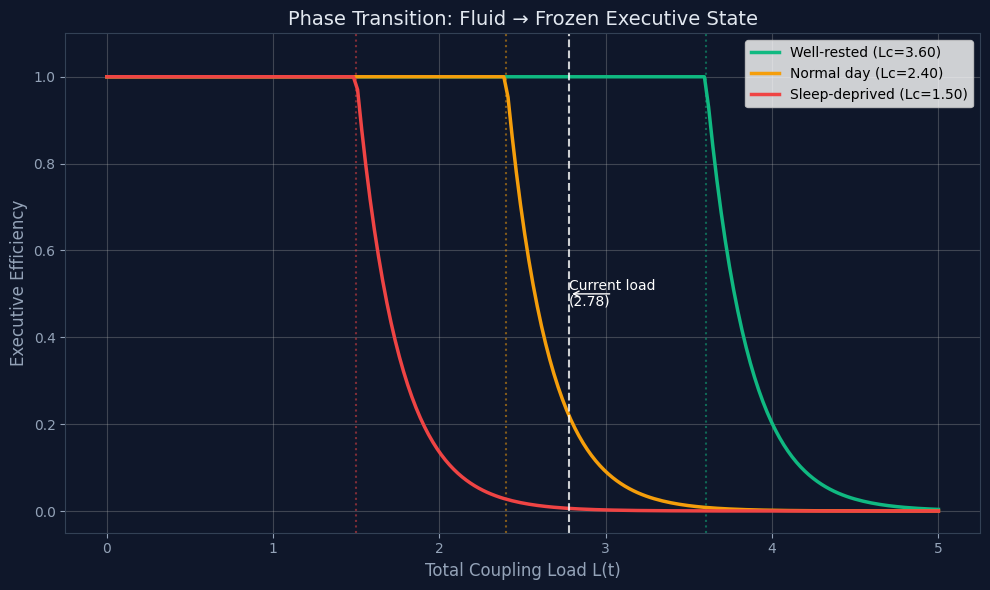

In [3]:
def executive_efficiency(L, L_c, gamma=5.0):
    """Efficiency as a function of load relative to critical threshold."""
    if L <= L_c:
        return 1.0
    return np.exp(-gamma * (L - L_c))

def critical_threshold(L0=3.0, fatigue=0.0, rest_bonus=0.0):
    """Compute L_c from base capacity and modifiers."""
    return L0 * (1.0 - fatigue) * (1.0 + rest_bonus)

# Three scenarios
scenarios = [
    ('Well-rested',     0.0, 0.2),
    ('Normal day',      0.2, 0.0),
    ('Sleep-deprived',  0.5, 0.0),
]

L_range = np.linspace(0, 5, 200)

fig, ax = plt.subplots(figsize=(10, 6))
colors_scen = ['#10b981', '#f59e0b', '#ef4444']

for (label, fatigue, rest), color in zip(scenarios, colors_scen):
    Lc = critical_threshold(fatigue=fatigue, rest_bonus=rest)
    eff = [executive_efficiency(L, Lc, gamma=4.0) for L in L_range]
    ax.plot(L_range, eff, label=f'{label} (Lc={Lc:.2f})', color=color, linewidth=2.5)
    ax.axvline(x=Lc, color=color, linestyle=':', alpha=0.5)

ax.axvline(x=total_load, color='white', linestyle='--', alpha=0.8, linewidth=1.5)
ax.annotate(f'Current load\n({total_load:.2f})',
            xy=(total_load, 0.5), fontsize=10, color='white',
            ha='left', va='center',
            arrowprops=dict(arrowstyle='->', color='white'))

ax.set_xlabel('Total Coupling Load L(t)', fontsize=12)
ax.set_ylabel('Executive Efficiency', fontsize=12)
ax.set_title('Phase Transition: Fluid \u2192 Frozen Executive State', fontsize=14)
ax.legend(fontsize=10)
ax.set_ylim(-0.05, 1.1)
ax.grid(True, alpha=0.3)
ax.set_facecolor('#0f172a')
fig.patch.set_facecolor('#0f172a')
ax.tick_params(colors='#94a3b8')
ax.xaxis.label.set_color('#94a3b8')
ax.yaxis.label.set_color('#94a3b8')
ax.title.set_color('#e2e8f0')
for spine in ax.spines.values():
    spine.set_color('#334155')
plt.tight_layout()
plt.show()

## 3. The Load Heatmap: Where Is the Weight?

Not all couplings are equal. A visual breakdown shows which
commitments are actually consuming your bandwidth.

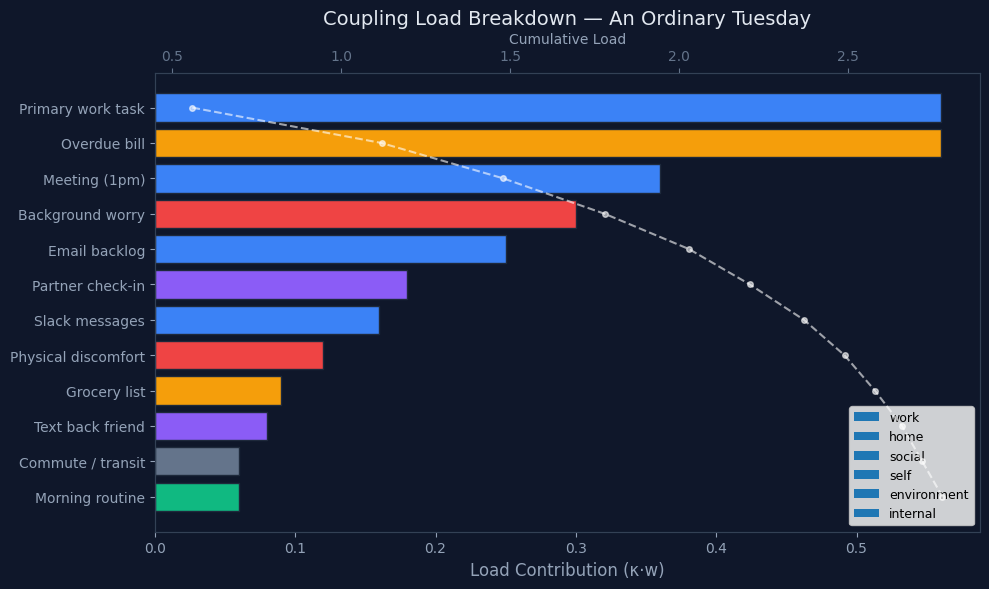

In [4]:
# Sort by load contribution
order = np.argsort(loads)[::-1]
sorted_names = [names[i] for i in order]
sorted_loads = loads[order]
sorted_cats  = [cats[i] for i in order]

cat_colors = {
    'work': '#3b82f6', 'home': '#f59e0b', 'social': '#8b5cf6',
    'self': '#10b981', 'environment': '#64748b', 'internal': '#ef4444',
}

fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = [cat_colors[c] for c in sorted_cats]
bars = ax.barh(range(len(sorted_names)), sorted_loads, color=bar_colors, edgecolor='#1e293b')
ax.set_yticks(range(len(sorted_names)))
ax.set_yticklabels(sorted_names, fontsize=10)
ax.set_xlabel('Load Contribution (\u03ba\u00b7w)', fontsize=12)
ax.set_title('Coupling Load Breakdown \u2014 An Ordinary Tuesday', fontsize=14)
ax.invert_yaxis()

cumulative = np.cumsum(sorted_loads)
ax2 = ax.twiny()
ax2.plot(cumulative, range(len(sorted_names)), 'o--', color='white', alpha=0.6, markersize=4)
ax2.set_xlabel('Cumulative Load', fontsize=10, color='#94a3b8')

for cat, col in cat_colors.items():
    ax.barh([], [], color=col, label=cat)
ax.legend(loc='lower right', fontsize=9)

ax.set_facecolor('#0f172a')
fig.patch.set_facecolor('#0f172a')
ax.tick_params(colors='#94a3b8')
ax2.tick_params(colors='#64748b')
ax.xaxis.label.set_color('#94a3b8')
ax.title.set_color('#e2e8f0')
for spine in ax.spines.values():
    spine.set_color('#334155')
for spine in ax2.spines.values():
    spine.set_color('#334155')
plt.tight_layout()
plt.show()

## 4. Temporal Dynamics: Load Accumulation Over a Day

Load is not static. Couplings activate and deactivate throughout
the day. We can model a 16-hour waking period and watch the load
curve rise, cross thresholds, and (sometimes) recover.

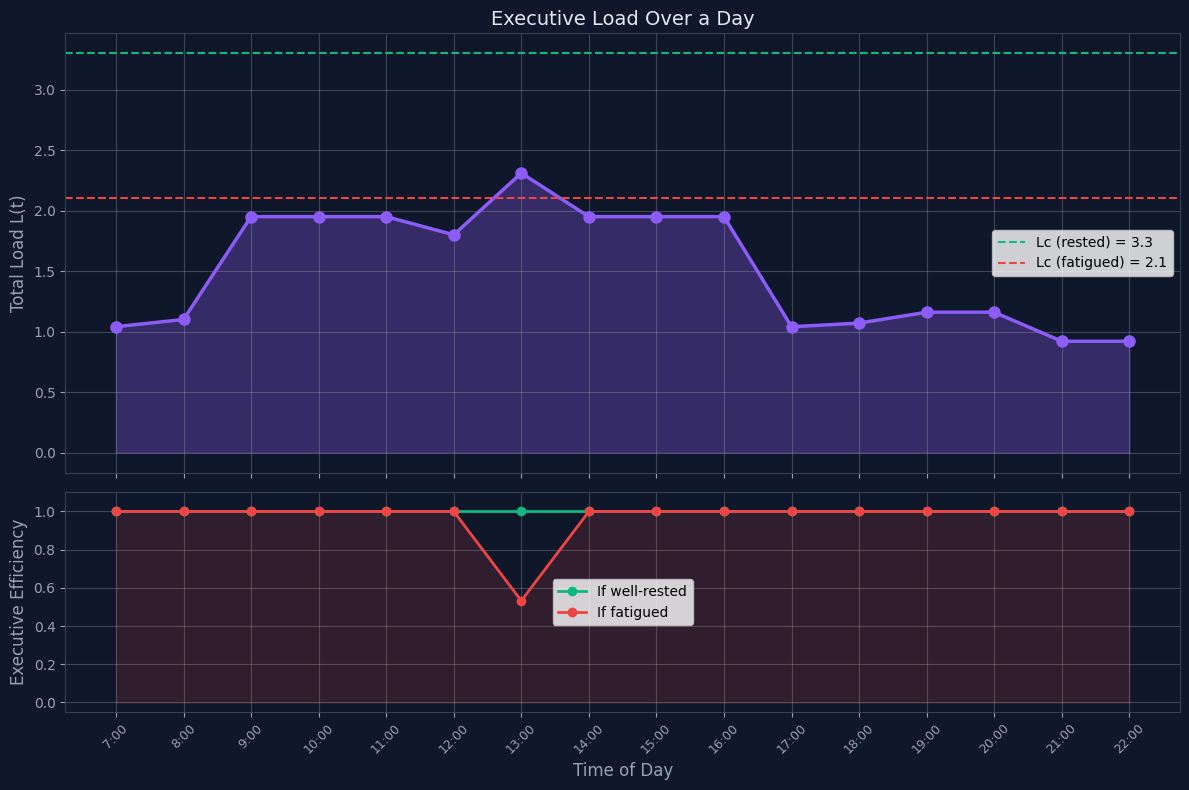

In [5]:
hours = np.arange(0, 16)
hour_labels = [f'{(h+7) % 24}:00' for h in hours]

schedules = [
    ('Morning routine',     0.3, 0.2,  0,  2),
    ('Commute',             0.2, 0.3,  1,  2),
    ('Primary work',        0.8, 0.7,  2, 10),
    ('Email',               0.5, 0.5,  2, 10),
    ('Slack',               0.4, 0.4,  2, 10),
    ('Meeting',             0.6, 0.6,  6,  7),
    ('Lunch break',        -0.3, 0.5,  5,  6),
    ('Commute home',        0.2, 0.3, 10, 11),
    ('Grocery run',         0.3, 0.3, 11, 12),
    ('Overdue bill',        0.7, 0.8,  0, 16),
    ('Partner check-in',    0.6, 0.3, 12, 14),
    ('Background worry',    0.5, 0.6,  0, 16),
    ('Physical discomfort', 0.3, 0.4,  0, 16),
    ('Evening wind-down',  -0.2, 0.3, 14, 16),
]

load_curve = np.zeros(len(hours))
for name, k, w, start, end in schedules:
    for h in range(start, min(end, 16)):
        load_curve[h] += k * w

Lc_rested = critical_threshold(fatigue=0.0, rest_bonus=0.1)
Lc_tired  = critical_threshold(fatigue=0.3, rest_bonus=0.0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True,
                                gridspec_kw={'height_ratios': [2, 1]})

ax1.fill_between(hours, load_curve, alpha=0.3, color='#8b5cf6')
ax1.plot(hours, load_curve, 'o-', color='#8b5cf6', linewidth=2.5, markersize=8)
ax1.axhline(y=Lc_rested, color='#10b981', linestyle='--', linewidth=1.5,
            label=f'Lc (rested) = {Lc_rested:.1f}')
ax1.axhline(y=Lc_tired, color='#ef4444', linestyle='--', linewidth=1.5,
            label=f'Lc (fatigued) = {Lc_tired:.1f}')
ax1.set_ylabel('Total Load L(t)', fontsize=12)
ax1.set_title('Executive Load Over a Day', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

eff_rested = [executive_efficiency(L, Lc_rested, gamma=3.0) for L in load_curve]
eff_tired  = [executive_efficiency(L, Lc_tired, gamma=3.0) for L in load_curve]
ax2.plot(hours, eff_rested, 'o-', color='#10b981', linewidth=2, label='If well-rested')
ax2.plot(hours, eff_tired, 'o-', color='#ef4444', linewidth=2, label='If fatigued')
ax2.fill_between(hours, eff_tired, alpha=0.15, color='#ef4444')
ax2.set_ylabel('Executive Efficiency', fontsize=12)
ax2.set_xlabel('Time of Day', fontsize=12)
ax2.set_xticks(hours)
ax2.set_xticklabels(hour_labels, rotation=45, fontsize=9)
ax2.set_ylim(-0.05, 1.1)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

for ax in [ax1, ax2]:
    ax.set_facecolor('#0f172a')
    ax.tick_params(colors='#94a3b8')
    ax.xaxis.label.set_color('#94a3b8')
    ax.yaxis.label.set_color('#94a3b8')
    for spine in ax.spines.values():
        spine.set_color('#334155')
ax1.title.set_color('#e2e8f0')
fig.patch.set_facecolor('#0f172a')
plt.tight_layout()
plt.show()

## 5. Intervention Analysis: What Happens If You Drop One Coupling?

The diagnostic value: which single coupling, if resolved, would have
the largest impact on peak load?

This is the **inverse inertia** question — where is the smallest
push that produces the largest state change?

In [6]:
base_peak = load_curve.max()
peak_hour = int(load_curve.argmax())

print(f'Current peak load: {base_peak:.3f} (at {hour_labels[peak_hour]})')
print(f'Critical threshold (fatigued): {Lc_tired:.2f}')
print(f'Overshoot: {base_peak - Lc_tired:+.3f}')
print()
hdr = ('If you resolve...', 'New peak', 'Δ peak', 'Still over Lc?')
print(f'{hdr[0]:<30} {hdr[1]:>9} {hdr[2]:>8} {hdr[3]:>15}')
print('-' * 65)

interventions = []
for name, k, w, start, end in schedules:
    if k < 0:
        continue
    alt_curve = load_curve.copy()
    for h in range(start, min(end, 16)):
        alt_curve[h] -= k * w
    alt_peak = alt_curve.max()
    delta = alt_peak - base_peak
    over = alt_peak > Lc_tired
    interventions.append((name, alt_peak, delta, over))
    print(f'{name:<30} {alt_peak:9.3f} {delta:+8.3f} {"YES" if over else "NO":>15}')

best = min(interventions, key=lambda x: x[1])
print(f'\nHighest-impact single intervention: resolve "{best[0]}"')
print(f'  Reduces peak load by {abs(best[2]):.3f} \u2192 {best[1]:.3f}')

Current peak load: 2.310 (at 13:00)
Critical threshold (fatigued): 2.10
Overshoot: +0.210

If you resolve...               New peak   Δ peak  Still over Lc?
-----------------------------------------------------------------
Morning routine                    2.310   +0.000             YES
Commute                            2.310   +0.000             YES
Primary work                       1.750   -0.560              NO
Email                              2.060   -0.250              NO
Slack                              2.150   -0.160             YES
Meeting                            1.950   -0.360              NO
Commute home                       2.310   +0.000             YES
Grocery run                        2.310   +0.000             YES
Overdue bill                       1.750   -0.560              NO
Partner check-in                   2.310   +0.000             YES
Background worry                   2.010   -0.300              NO
Physical discomfort                2.190   -0.120  

## 6. Your Own Load Profile

Edit the cell below to map your own couplings. Change the names, $\kappa$ values,
weights, and schedules. Then re-run all cells above to see your personal
executive load diagnostic.

**Guidelines for scoring:**

| Parameter | 0.0–0.3 (Low) | 0.4–0.6 (Medium) | 0.7–1.0 (High) |
|-----------|----------------|-------------------|-----------------|
| **$\kappa$** (coupling) | Can ignore for hours | Pops into mind regularly | Constantly pulling attention |
| **$w$** (weight) | Trivial, automatic | Requires focus and decisions | Complex, emotionally costly |

In [7]:
# ===== YOUR COUPLINGS — EDIT HERE =====
my_couplings = [
    # ('Description',         kappa, weight, category),
    ('Primary work task',     0.8,   0.7,   'work'),
    ('Email / messages',      0.5,   0.5,   'work'),
    ('Household chore',       0.3,   0.3,   'home'),
    ('Relationship check-in', 0.6,   0.3,   'social'),
    ('Health concern',        0.5,   0.6,   'internal'),
    # Add your own...
]

my_loads = [k * w for _, k, w, _ in my_couplings]
my_total = sum(my_loads)
my_Lc = critical_threshold(fatigue=0.2)

print(f'Your total load:      {my_total:.3f}')
print(f'Your threshold (Lc):  {my_Lc:.2f}')
state = 'FLUID' if my_total <= my_Lc else 'FROZEN'
marker = '\u2705' if state == 'FLUID' else '\u26a0\ufe0f'
print(f'Status:               {marker} {state}')
print(f'Efficiency:           {executive_efficiency(my_total, my_Lc, gamma=4.0):.1%}')

Your total load:      1.380
Your threshold (Lc):  2.40
Status:               ✅ FLUID
Efficiency:           100.0%


## Key Takeaways

1. **Executive dysfunction is a phase transition**, not a character flaw.
   When coupling load $L$ exceeds threshold $L_c$, efficiency collapses
   exponentially.

2. **The threshold is biological and situational.** Sleep, nutrition,
   chronic stress, and neurotype all modulate $L_c$. The same task list
   that was manageable yesterday can be paralyzing today.

3. **Background couplings are the hidden killers.** Persistent worries,
   unresolved obligations, and chronic physical discomfort consume
   bandwidth even when you're not actively attending to them.

4. **The highest-impact intervention is often not the "hardest" task** —
   it's the one with the highest $\kappa \cdot w$ product that occupies
   the most hours. Resolving the overdue bill might free more bandwidth
   than finishing the work project.

5. **This is not a productivity tool.** It is an **empathy tool**.
   Understanding the eigenstate means understanding that the frozen
   person is not lazy — they are in a different phase of the same
   system you are in when things are flowing.

---

*Everett, B. (2025). The Coupling Asymmetry: Executive Dysfunction as an
Eigenstate of the Memory–Baseline System. Zenodo.*  
[10.5281/zenodo.18519187](https://doi.org/10.5281/zenodo.18519187)